In [ ]:
##importing various libraries and packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt



In [ ]:
#reading the dataset from url 
crime_data = pd.read_csv("https://raw.githubusercontent.com/deepthi248/My_python_journey/master/Crime_india_data.csv")



In [31]:
crime_df = crime_data.copy()
#creating duplicate dataset to go further - incase of backup 
crime_data.head()



,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5


In [70]:
crime_df.shape

(494, 14)

In [71]:
crime_df.isna().any()
# no NA values 

STATE/UT      False
CRIME HEAD    False
2001          False
2002          False
2003          False
2004          False
2005          False
2006          False
2007          False
2008          False
2009          False
2010          False
2011          False
2012          False
dtype: bool

In [99]:
# grouping by states 
crime_grouped = crime_df.groupby(crime_df['STATE/UT'],as_index=False).sum()
crime_grouped['cumulative_sum'] = crime_grouped.sum(axis=1)
# sorting the data in assending order 
crime_grouped.sort_values(by ='cumulative_sum')
#shared % of crimes 


,STATE/UT,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,cumulative_sum
18,LAKSHADWEEP,2,0,0,0,0,0,0,0,0,0,0,0,2
8,DAMAN & DIU,0,0,12,0,12,4,12,20,2,8,0,18,88
24,NAGALAND,0,0,0,2,0,10,12,12,0,20,40,24,120
7,D & N HAVELI,0,0,10,2,16,24,12,50,30,24,10,28,206
2,ARUNACHAL PRADESH,0,10,0,26,48,36,8,40,54,42,68,78,410
26,PUDUCHERRY,8,46,10,26,22,78,44,50,40,44,58,64,490
29,SIKKIM,12,16,30,70,24,28,52,28,66,68,66,60,520
0,A & N ISLANDS,0,0,8,40,34,20,18,104,126,122,72,66,610
23,MIZORAM,0,0,0,0,0,70,128,42,30,100,114,186,670
21,MANIPUR,0,0,182,46,32,76,42,12,80,78,98,66,712


In [82]:
max_India= crime_grouped[crime_grouped['STATE/UT']== 'TOTAL (ALL-INDIA)'].cumulative_sum.values
max_states =crime_grouped[crime_grouped['STATE/UT']== 'TOTAL (STATES)'].cumulative_sum.values
max_ut=crime_grouped[crime_grouped['STATE/UT']== 'TOTAL (UTs)'].cumulative_sum.values
max_India.astype(int)
max_states.astype(int)
max_ut.astype(int)


array([23955])

In [120]:
crime_grouped.tail()
rslt_df = crime_grouped.loc[(crime_grouped['STATE/UT'] != 'TOTAL (ALL-INDIA)')&(crime_grouped['STATE/UT'] != 'TOTAL (UTs)')&(crime_grouped['STATE/UT'] != 'TOTAL (STATES)')] 
  #adding % contributed 
#crime_grouped.reset_index(drop=True)

In [137]:
rslt_df = rslt_df.sort_values(by='cumulative_sum')
rslt_df

,STATE/UT,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,cumulative_sum
18,LAKSHADWEEP,2,0,0,0,0,0,0,0,0,0,0,0,2
8,DAMAN & DIU,0,0,12,0,12,4,12,20,2,8,0,18,88
24,NAGALAND,0,0,0,2,0,10,12,12,0,20,40,24,120
7,D & N HAVELI,0,0,10,2,16,24,12,50,30,24,10,28,206
2,ARUNACHAL PRADESH,0,10,0,26,48,36,8,40,54,42,68,78,410
26,PUDUCHERRY,8,46,10,26,22,78,44,50,40,44,58,64,490
29,SIKKIM,12,16,30,70,24,28,52,28,66,68,66,60,520
0,A & N ISLANDS,0,0,8,40,34,20,18,104,126,122,72,66,610
23,MIZORAM,0,0,0,0,0,70,128,42,30,100,114,186,670
21,MANIPUR,0,0,182,46,32,76,42,12,80,78,98,66,712


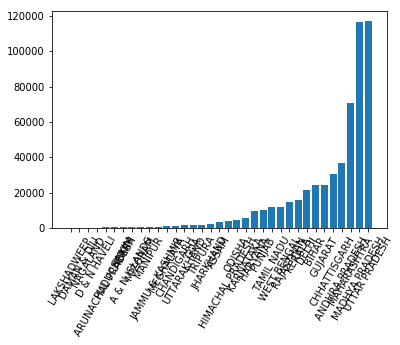

<Figure size 2160x720 with 0 Axes>

In [136]:
# visualising the data 
positions = range(len(rslt_df['STATE/UT']))
labels = rslt_df['STATE/UT'].tolist()
plt.bar(positions,rslt_df['cumulative_sum'],width=0.8)
plt.xticks(positions, labels,rotation=60)
plt.figure(figsize=(30,10))
plt.show()




In [139]:
year_wise_sum = rslt_df.sum(axis = 0, skipna = True) 
year_wise_sum

STATE/UT          LAKSHADWEEPDAMAN & DIUNAGALANDD & N HAVELIARUN...
2001                                                          26802
2002                                                          25014
2003                                                          27048
2004                                                          33326
2005                                                          34706
2006                                                          41740
2007                                                          44864
2008                                                          51532
2009                                                          52062
2010                                                          54888
2011                                                          70854
2012                                                          84234
cumulative_sum                                               547070
dtype: object

In [140]:
plt.line(year_wise_sum)
plt.show

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

In [ ]:
#web scrapping to get the region wise data along with literac